 ## importing the data / scrapping  



In [1]:
## importing the data 

import requests

requests.__path__
from datetime import datetime

In [2]:
url = 'https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end=20191001'

In [3]:
response = requests.get(url)

In [4]:
response.status_code 

200

In [ ]:
print(response.text)

In [6]:
page = response.text

In [7]:
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(page, "lxml")

In [ ]:
print(soup.prettify())

In [10]:
table = soup.find('table', attrs={'class':'table'})

In [11]:
table_rows = table.find_all('tr')

In [12]:
import pandas as pd 

In [13]:
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
ether_vol = pd.DataFrame(l, columns=["DATE", "OPEN", "HIGH","LOW","CLOSE","VOLUME","MARKET_CAP"])

In [ ]:
ether_vol.head()

In [ ]:
ether_vol.info()

In [16]:
Ether_supp = pd.read_csv('export-Ethersupply2.csv')

In [ ]:
Ether_supp.head()

In [18]:
ether_vol['DATE'] = pd.to_datetime(ether_vol['DATE'])

In [19]:
Ether_supp['Date(UTC)'] = pd.to_datetime(Ether_supp['Date(UTC)'])

In [20]:
Ether_supp = Ether_supp.rename(columns={'Date(UTC)': 'DATE'})

In [ ]:
Ether_supp.head()

In [22]:
ether_vol.set_index('DATE', inplace=True) 
Ether_supp.set_index('DATE', inplace=True) 

In [23]:
test1 = ether_vol.join(Ether_supp)

In [ ]:
test1.head()

In [25]:
test1.columns = ['OPEN', 'HIGH','LOW','CLOSE','VOLUME','MARKET_CAP','UnixTimeStamp','supply']

In [ ]:
test1.describe()

In [27]:
test1.corr()

,UnixTimeStamp,supply
UnixTimeStamp,1.000000,0.992276
supply,0.992276,1.000000


In [28]:
type(test1.loc['2019-10-01','OPEN'].values[0])

str

In [ ]:
test1

## inserting more data 

In [ ]:
pwd 


In [31]:
# load the data 
trans_fee = pd.read_csv('export-TransactionFee.csv')
block_rwar = pd.read_csv('blockreward.csv')
netwrk_utz = pd.read_csv('export-NetworkUtilization.csv')
block_diff = pd.read_csv('export-BlockDifficulty.csv')

In [32]:
#change to datetime object 
trans_fee['Date(UTC)'] = pd.to_datetime(trans_fee['Date(UTC)'])
block_rwar['Date(UTC)'] = pd.to_datetime(block_rwar['Date(UTC)'])
netwrk_utz['Date(UTC)'] = pd.to_datetime(netwrk_utz['Date(UTC)'])
block_diff['Date(UTC)'] = pd.to_datetime(block_diff['Date(UTC)'])


In [33]:
#check
block_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 3 columns):
Date(UTC)        1526 non-null datetime64[ns]
UnixTimeStamp    1526 non-null int64
Value            1526 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 35.8 KB


In [34]:
trans_fee = trans_fee.rename(columns={'Date(UTC)': 'DATE'})
block_rwar = block_rwar.rename(columns={'Date(UTC)': 'DATE'})
netwrk_utz = netwrk_utz.rename(columns={'Date(UTC)': 'DATE'})
block_diff = block_diff.rename(columns={'Date(UTC)': 'DATE'})

In [ ]:
#check
block_diff['DATE']

In [36]:
# set index as date 
trans_fee.set_index('DATE', inplace=True) 
block_rwar.set_index('DATE', inplace=True) 
netwrk_utz.set_index('DATE', inplace=True) 
block_diff.set_index('DATE', inplace=True) 

In [ ]:
test1

In [38]:
del trans_fee['UnixTimeStamp']
del block_rwar['UnixTimeStamp']
del netwrk_utz['UnixTimeStamp']
del block_diff['UnixTimeStamp']


In [39]:
del test1['UnixTimeStamp']

In [40]:
test1 = test1.join(trans_fee, how ="left")
test1=test1.rename(columns = {'Value':'Transaction Fee'})

In [41]:
test1 = test1.join(block_rwar, how ="left")
test1=test1.rename(columns = {'Value':'Blockreward'})

In [42]:
test1=test1.rename(columns = {'Value':'Blockreward'})

In [ ]:
test1

In [44]:
test1 = test1.join(netwrk_utz, how ="left")

In [45]:
test1=test1.rename(columns = {'Value':'Network utilization'})

In [46]:
test1 = test1.join(block_diff, how ="left")

In [47]:
test1=test1.rename(columns = {'Value':'block_difficulty'})

## EDA

In [ ]:
test1.head()

In [49]:
missing_data = test1.isnull()

In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

In [ ]:
test1.head(1)

In [52]:
test2 = test1.dropna()

In [ ]:
for column in test2.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

In [ ]:
test1.loc[test1['block_difficulty'].isnull()]

In [ ]:
test1.corr()

In [56]:
type(test1.loc['2019-10-01','OPEN'].values[0])

str

In [57]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1517 entries, 2019-10-01 to 2015-08-07
Data columns (total 11 columns):
OPEN                   1517 non-null object
HIGH                   1517 non-null object
LOW                    1517 non-null object
CLOSE                  1517 non-null object
VOLUME                 1517 non-null object
MARKET_CAP             1517 non-null object
supply                 1517 non-null float64
Transaction Fee        1517 non-null object
Blockreward            1517 non-null float64
Network utilization    1517 non-null float64
block_difficulty       1517 non-null float64
dtypes: float64(4), object(7)
memory usage: 142.2+ KB


In [58]:
test2.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKET_CAP,supply,Transaction Fee,Blockreward,Network utilization,block_difficulty
DATE,,,,,,,,,,,
2019-10-01,180.21,185.05,175.81,177.34,"7,676,276,225","19,148,222,892",1.079744e+08,510519279421006941765,13571.0625,0.8166,2449.823
2019-09-30,170.46,179.87,167.04,179.87,"7,552,915,148","19,419,149,343",1.079609e+08,1014741493509434163372,13445.5625,0.9369,2461.362
2019-09-29,174.61,175.21,167.00,170.50,"6,497,088,199","18,405,401,315",1.079474e+08,1131885866024375650266,13575.6875,0.9567,2451.547
2019-09-28,174.68,175.78,170.77,174.57,"6,895,423,445","18,842,313,324",1.079338e+08,1214596925322569116725,13530.6875,0.9522,2475.973
2019-09-27,166.65,175.61,163.21,174.71,"7,909,313,625","18,854,855,889",1.079203e+08,1239590123761337528692,13399.1250,0.9134,2483.532


In [59]:
import numpy as np 
test2['HIGH']= test2['HIGH'].apply(lambda x: round(np.float(x), 2))

/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
type(test1.loc['2019-10-01','OPEN'].values[0])

str

In [61]:
test2.corr()

,HIGH,supply,Blockreward,Network utilization,block_difficulty
HIGH,1.000000,0.491220,-0.454497,0.691671,0.665436
supply,0.491220,1.000000,-0.800398,0.907488,0.839891
Blockreward,-0.454497,-0.800398,1.000000,-0.863434,-0.788653
Network utilization,0.691671,0.907488,-0.863434,1.000000,0.927747
block_difficulty,0.665436,0.839891,-0.788653,0.927747,1.000000


In [62]:
test2['OPEN']= test2['OPEN'].apply(lambda x: round(np.float(x), 2))

/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
test2.corr()

,OPEN,HIGH,supply,Blockreward,Network utilization,block_difficulty
OPEN,1.000000,0.998634,0.497073,-0.460191,0.696598,0.674776
HIGH,0.998634,1.000000,0.491220,-0.454497,0.691671,0.665436
supply,0.497073,0.491220,1.000000,-0.800398,0.907488,0.839891
Blockreward,-0.460191,-0.454497,-0.800398,1.000000,-0.863434,-0.788653
Network utilization,0.696598,0.691671,0.907488,-0.863434,1.000000,0.927747
block_difficulty,0.674776,0.665436,0.839891,-0.788653,0.927747,1.000000


In [64]:
test2['LOW']= test2['LOW'].apply(lambda x: round(np.float(x), 2))

/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
test2['CLOSE']= test2['CLOSE'].apply(lambda x: round(np.float(x), 2))

/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
test2['VOLUME']= test2['VOLUME'].apply(lambda x: x.replace(',', ''))



/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
test2['VOLUME']= test2['VOLUME'].apply(lambda x: round(np.float(x), 2))

/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
test2['MARKET_CAP']= str(test2['MARKET_CAP'])

/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
test2['MARKET_CAP']= test2['MARKET_CAP'].apply(lambda x: x.replace(',', ''))
test2['MARKET_CAP']

/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


DATE
2019-10-01    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-30    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-29    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-28    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-27    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-26    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-25    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-24    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-23    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-22    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-21    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-20    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-19    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-18    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-17    DATE\n2019-10-01    19148222892\n2019-09-30   ...
2019-09-16    DATE\n2019-10-01    1

In [70]:
test2['MARKET_CAP'].dtype

dtype('O')

In [71]:
test2['Transaction Fee']= test2['Transaction Fee'].apply(lambda x: round(np.float(x), 2))

/Users/shreyakvashisht/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
test2.corr()

,OPEN,HIGH,LOW,CLOSE,VOLUME,supply,Transaction Fee,Blockreward,Network utilization,block_difficulty
OPEN,1.000000,0.998634,0.996670,0.996653,0.352923,0.497073,0.642514,-0.460191,0.696598,0.674776
HIGH,0.998634,1.000000,0.996688,0.998540,0.355449,0.491220,0.647894,-0.454497,0.691671,0.665436
LOW,0.996670,0.996688,1.000000,0.998081,0.350380,0.504750,0.640257,-0.468066,0.703326,0.682921
CLOSE,0.996653,0.998540,0.998081,1.000000,0.353689,0.496471,0.644508,-0.460001,0.696466,0.671477
VOLUME,0.352923,0.355449,0.350380,0.353689,1.000000,0.707610,0.434207,-0.755768,0.672350,0.491877
supply,0.497073,0.491220,0.504750,0.496471,0.707610,1.000000,0.489260,-0.800398,0.907488,0.839891
Transaction Fee,0.642514,0.647894,0.640257,0.644508,0.434207,0.489260,1.000000,-0.460553,0.635828,0.543271
Blockreward,-0.460191,-0.454497,-0.468066,-0.460001,-0.755768,-0.800398,-0.460553,1.000000,-0.863434,-0.788653
Network utilization,0.696598,0.691671,0.703326,0.696466,0.672350,0.907488,0.635828,-0.863434,1.000000,0.927747
block_difficulty,0.674776,0.665436,0.682921,0.671477,0.491877,0.839891,0.543271,-0.788653,0.927747,1.000000


In [73]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

## INITIAL MODELLING 

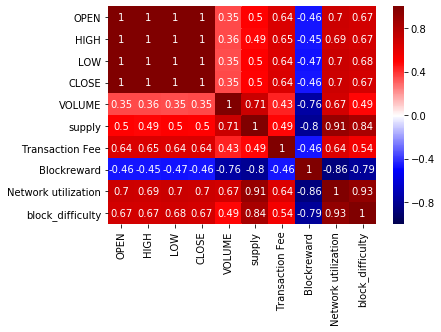

In [74]:
sns.heatmap(test2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [75]:
test2['Network utilization']

DATE
2019-10-01    0.8166
2019-09-30    0.9369
2019-09-29    0.9567
2019-09-28    0.9522
2019-09-27    0.9134
2019-09-26    0.9131
2019-09-25    0.9428
2019-09-24    0.9531
2019-09-23    0.9549
2019-09-22    0.9386
2019-09-21    0.9530
2019-09-20    0.9492
2019-09-19    0.9456
2019-09-18    0.9463
2019-09-17    0.9504
2019-09-16    0.9542
2019-09-15    0.9500
2019-09-14    0.9418
2019-09-13    0.9417
2019-09-12    0.9386
2019-09-11    0.9364
2019-09-10    0.9405
2019-09-09    0.9411
2019-09-08    0.9407
2019-09-07    0.9417
2019-09-06    0.9474
2019-09-05    0.9427
2019-09-04    0.9356
2019-09-03    0.9420
2019-09-02    0.9328
               ...  
2015-09-05    0.0103
2015-09-04    0.0120
2015-09-03    0.0119
2015-09-02    0.0124
2015-09-01    0.0113
2015-08-31    0.0100
2015-08-30    0.0079
2015-08-29    0.0073
2015-08-28    0.0077
2015-08-27    0.0100
2015-08-26    0.0063
2015-08-25    0.0071
2015-08-24    0.0060
2015-08-23    0.0075
2015-08-22    0.0055
2015-08-21    0.0067
2015-08-

In [76]:
test2 = test2.rename(columns={'Transaction Fee': 'Transaction_Fee'})

In [77]:
test2 = test2.rename(columns={'Network utilization': 'Network_utilizatione'})

In [78]:
test2.corr()

,OPEN,HIGH,LOW,CLOSE,VOLUME,supply,Transaction_Fee,Blockreward,Network_utilizatione,block_difficulty
OPEN,1.000000,0.998634,0.996670,0.996653,0.352923,0.497073,0.642514,-0.460191,0.696598,0.674776
HIGH,0.998634,1.000000,0.996688,0.998540,0.355449,0.491220,0.647894,-0.454497,0.691671,0.665436
LOW,0.996670,0.996688,1.000000,0.998081,0.350380,0.504750,0.640257,-0.468066,0.703326,0.682921
CLOSE,0.996653,0.998540,0.998081,1.000000,0.353689,0.496471,0.644508,-0.460001,0.696466,0.671477
VOLUME,0.352923,0.355449,0.350380,0.353689,1.000000,0.707610,0.434207,-0.755768,0.672350,0.491877
supply,0.497073,0.491220,0.504750,0.496471,0.707610,1.000000,0.489260,-0.800398,0.907488,0.839891
Transaction_Fee,0.642514,0.647894,0.640257,0.644508,0.434207,0.489260,1.000000,-0.460553,0.635828,0.543271
Blockreward,-0.460191,-0.454497,-0.468066,-0.460001,-0.755768,-0.800398,-0.460553,1.000000,-0.863434,-0.788653
Network_utilizatione,0.696598,0.691671,0.703326,0.696466,0.672350,0.907488,0.635828,-0.863434,1.000000,0.927747
block_difficulty,0.674776,0.665436,0.682921,0.671477,0.491877,0.839891,0.543271,-0.788653,0.927747,1.000000


In [79]:
y, X = patsy.dmatrices('block_difficulty ~ Transaction_Fee + supply + Blockreward  ', data=test2, return_type="dataframe")


In [80]:
model = sm.OLS(y, X)

In [81]:
fit = model.fit()

In [82]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       block_difficulty   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     976.7
Date:                Tue, 08 Oct 2019   Prob (F-statistic):          6.71e-166
Time:                        16:33:44   Log-Likelihood:                -12645.
No. Observations:                1517   AIC:                         2.529e+04
Df Residuals:                    1515   BIC:                         2.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.272e-13   3.96e-15     32.108      0.000    1.19e-13    1.35e-13
Transaction_Fee  1.168e-18   5.38e-20     21.715      0.000    1.06e-18    1.27e-18
supply           1.147e-05   3.57e-07     32.108      0.000    1.08e-05    1.22e-05
Blockreward      3.181e-09   9.91e-11     32.108      0.000    2.99e-09    3.38e-09
==============================================================================
Omnibus:                       71.691   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.259
Skew:                           0.336   Prob(JB):                     1.22e-11
Kurtosis:                       2.415   Cond. No.                     1.21e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+22. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
test2.to_pickle('cleaned_prj2.pkl')

In [84]:
df = pd.read_pickle('cleaned_prj2.pkl')

In [85]:
df.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKET_CAP,supply,Transaction_Fee,Blockreward,Network_utilizatione,block_difficulty
DATE,,,,,,,,,,,
2019-10-01,180.21,185.05,175.81,177.34,7.676276e+09,DATE\n2019-10-01 19148222892\n2019-09-30 ...,1.079744e+08,5.105193e+20,13571.0625,0.8166,2449.823
2019-09-30,170.46,179.87,167.04,179.87,7.552915e+09,DATE\n2019-10-01 19148222892\n2019-09-30 ...,1.079609e+08,1.014741e+21,13445.5625,0.9369,2461.362
2019-09-29,174.61,175.21,167.00,170.50,6.497088e+09,DATE\n2019-10-01 19148222892\n2019-09-30 ...,1.079474e+08,1.131886e+21,13575.6875,0.9567,2451.547
2019-09-28,174.68,175.78,170.77,174.57,6.895423e+09,DATE\n2019-10-01 19148222892\n2019-09-30 ...,1.079338e+08,1.214597e+21,13530.6875,0.9522,2475.973
2019-09-27,166.65,175.61,163.21,174.71,7.909314e+09,DATE\n2019-10-01 19148222892\n2019-09-30 ...,1.079203e+08,1.239590e+21,13399.1250,0.9134,2483.532


In [87]:
test2.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME,MARKET_CAP,supply,Transaction_Fee,Blockreward,Network_utilizatione,block_difficulty
DATE,,,,,,,,,,,
2019-10-01,180.21,185.05,175.81,177.34,7.676276e+09,DATE\n2019-10-01 19148222892\n2019-09-30 ...,1.079744e+08,5.105193e+20,13571.0625,0.8166,2449.823
2019-09-30,170.46,179.87,167.04,179.87,7.552915e+09,DATE\n2019-10-01 19148222892\n2019-09-30 ...,1.079609e+08,1.014741e+21,13445.5625,0.9369,2461.362
2019-09-29,174.61,175.21,167.00,170.50,6.497088e+09,DATE\n2019-10-01 19148222892\n2019-09-30 ...,1.079474e+08,1.131886e+21,13575.6875,0.9567,2451.547
2019-09-28,174.68,175.78,170.77,174.57,6.895423e+09,DATE\n2019-10-01 19148222892\n2019-09-30 ...,1.079338e+08,1.214597e+21,13530.6875,0.9522,2475.973
2019-09-27,166.65,175.61,163.21,174.71,7.909314e+09,DATE\n2019-10-01 19148222892\n2019-09-30 ...,1.079203e+08,1.239590e+21,13399.1250,0.9134,2483.532


In [89]:
 test3 = test2.drop(['OPEN','HIGH','LOW','CLOSE','VOLUME','MARKET_CAP'],axis = 1)

In [90]:
test3.to_pickle('cleaned_prj3.pkl')